In [1]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import random
import pandas as pd
import os

class MyModel_0(nn.Module):
    def __init__(self):#在这里定义网络层
        super(MyModel_0, self).__init__()
        self.liner1=nn.Linear(1504,1,bias=False)
        nn.init.zeros_(self.liner1.weight)

    def forward(self,x):#前向传播
        output=self.liner1(x)
        return output
    
class MyModel_1(nn.Module):
    def __init__(self):#在这里定义网络层
        super(MyModel_1, self).__init__()
        self.liner1=nn.Linear(1504,1,bias=False)
        nn.init.zeros_(self.liner1.weight)

    def forward(self,x):#前向传播
        output=self.liner1(x)
        return output

class CustomLoss(torch.nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()

    def forward(self, output, target):
        loss = torch.mean(0.5*(output - target)**2)   # 定义自己的损失函数，这里是MSE
        return loss
model_0=MyModel_0()#建立模型
model_1=MyModel_1()#建立模型
loss_fn=CustomLoss()#构建损失函数
optimizer_0=optim.Adam(model_0.parameters(),lr=0.001)#构建优化器(模型参数,学习率)
optimizer_1=optim.Adam(model_1.parameters(),lr=0.001)#构建优化器(模型参数,学习率)

In [2]:
model_0.load_state_dict(torch.load(r"C:\Users\98306\Desktop\实验\final_test\只有两个递减的特征\model_0.pkl")) 
model_1.load_state_dict(torch.load(r"C:\Users\98306\Desktop\实验\final_test\只有两个递减的特征\model_1.pkl")) 

<All keys matched successfully>

In [3]:
x=[_ for _ in range(1,61)]
file_name=np.array(x)
y11=[]
y12=[]
y13=[]
# file_name=np.array([100])
for i in file_name:
    root_path=os.path.join("C:\\Users\\98306\\Desktop\\实验\\final_test\\test\\sqrt\\间隔小一些",str(i))
    res,B_=0,0
    people=0
    for j in range(20):
        road_path=os.path.join(root_path,str(j)+'_road.xlsx')
        road=pd.read_excel(road_path)
        road=road.to_numpy()
        
        b_path=os.path.join(root_path,str(j)+'_b.xlsx')
        b=pd.read_excel(b_path,header=None)
        b=b.to_numpy().flatten()
        
        path=r'C:\Users\98306\Desktop\实验\Real map\poi次数分布(总次数为1241).xlsx'
        df=pd.read_excel(path)
        arr_df = df.to_numpy().flatten()
        B=5000
        danwei_b=B/(1241*30)
        for k in range(road.shape[0]):
            for w in range(road.shape[1]):
                if arr_df[w]==0:
                    road[k,w]=0
            if road[k].sum()*danwei_b<b[k]:
                continue
            s= np.array([]).astype(np.double)
            s= np.append(s,1)#
            s= np.append(s,k)#D
            s= np.concatenate((s, road[k]))#I 将road[j]按照从小到大排序一下
            s= np.append(s,b[k])#D
            s= np.concatenate((s,arr_df))#I
            s= np.append(s,B)#I
            s=torch.Tensor(s)
            t0=model_0(s)
            t1=model_1(s)
#             print("t0[0]:",t0[0],'t1[0]',t1[0])
            if t0[0]<t1[0]:
                B-=road[k].sum()*danwei_b
                res+=road[k].sum()
                people+=1
#                 print('yes:',road[k].sum(),b[k])
                for w in range(road.shape[1]):
                    if road[k,w]>0:
                        arr_df[w]-=1
#             else:
#                 print('no:',road[k].sum(),b[k])
#         print("----------")
        B_+=B
    print("Rmax:",i/10,"   平均价值：",res/20,"    平均支付预算:",5000-B_/20,"    平均选中人数:",people/20)
    y11.append(res/20)
    y12.append(5000-B_/20)
    y13.append(people/20)

Rmax: 0.1    平均价值： 15037.5     平均支付预算: 2019.5406929895244     平均选中人数: 56.45
Rmax: 0.2    平均价值： 15090.0     平均支付预算: 2026.5914585012083     平均选中人数: 54.85
Rmax: 0.3    平均价值： 15025.5     平均支付预算: 2017.9290894439964     平均选中人数: 55.35
Rmax: 0.4    平均价值： 15039.0     平均支付预算: 2019.7421434327157     平均选中人数: 54.9
Rmax: 0.5    平均价值： 15061.5     平均支付预算: 2022.7639000805798     平均选中人数: 54.8
Rmax: 0.6    平均价值： 15019.5     平均支付预算: 2017.123287671233     平均选中人数: 55.9
Rmax: 0.7    平均价值： 14995.5     平均支付预算: 2013.900080580178     平均选中人数: 54.95
Rmax: 0.8    平均价值： 15067.5     平均支付预算: 2023.5697018533438     平均选中人数: 55.65
Rmax: 0.9    平均价值： 15136.5     平均支付预算: 2032.8364222401287     平均选中人数: 56.7
Rmax: 1.0    平均价值： 15030.0     平均支付预算: 2018.5334407735704     平均选中人数: 55.55
Rmax: 1.1    平均价值： 11834.5805893205     平均支付预算: 1589.3876697986184     平均选中人数: 44.35
Rmax: 1.2    平均价值： 12518.432997574328     平均支付预算: 1681.2292502785795     平均选中人数: 45.05
Rmax: 1.3    平均价值： 13098.827713482     平均支付预算: 1759.1764321087726     平均选中

In [4]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import random
import pandas as pd
import os

class MyModel_0(nn.Module):
    def __init__(self):#在这里定义网络层
        super(MyModel_0, self).__init__()
        self.liner1=nn.Linear(755,1,bias=False)
        nn.init.zeros_(self.liner1.weight)

    def forward(self,x):#前向传播
        output=self.liner1(x)
        return output
    
class MyModel_1(nn.Module):
    def __init__(self):#在这里定义网络层
        super(MyModel_1, self).__init__()
        self.liner1=nn.Linear(755,1,bias=False)
        nn.init.zeros_(self.liner1.weight)

    def forward(self,x):#前向传播
        output=self.liner1(x)
        return output

class CustomLoss(torch.nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()

    def forward(self, output, target):
        loss = torch.mean(0.5*(output - target)**2)   # 定义自己的损失函数，这里是MSE
        return loss
model_0=MyModel_0()#建立模型
model_1=MyModel_1()#建立模型
loss_fn=CustomLoss()#构建损失函数
optimizer_0=optim.Adam(model_0.parameters(),lr=0.001)#构建优化器(模型参数,学习率)
optimizer_1=optim.Adam(model_1.parameters(),lr=0.001)#构建优化器(模型参数,学习率)

In [5]:
model_0.load_state_dict(torch.load(r"C:\Users\98306\Desktop\实验\final_test\只有两个递减的特征_简化版本\model_0.pkl")) 
model_1.load_state_dict(torch.load(r"C:\Users\98306\Desktop\实验\final_test\只有两个递减的特征_简化版本\model_1.pkl")) 

<All keys matched successfully>

In [6]:
x=[_ for _ in range(1,61)]
file_name=np.array(x)
y21=[]
y22=[]
y23=[]
# file_name=np.array([600])
for i in file_name:
    root_path=os.path.join("C:\\Users\\98306\\Desktop\\实验\\final_test\\test\\sqrt\\间隔小一些",str(i))
    res,B_=0,0
    people=0
    for j in range(20):
        road_path=os.path.join(root_path,str(j)+'_road.xlsx')
        road=road=pd.read_excel(road_path)
        road=road.to_numpy()
        
        b_path=os.path.join(root_path,str(j)+'_b.xlsx')
        b=pd.read_excel(b_path,header=None)
        b=b.to_numpy().flatten()
        
        path=r'C:\Users\98306\Desktop\实验\Real map\poi次数分布(总次数为1241).xlsx'
        df=pd.read_excel(path)
        arr_df = df.to_numpy().flatten()
        B=5000
        danwei_b=B/(1241*30)
        for k in range(road.shape[0]):
            for w in range(road.shape[1]):
                if arr_df[w]==0:
                    road[k,w]=0
            if road[k].sum()*danwei_b<b[k]:
                continue
            s= np.array([]).astype(np.double)
            s= np.append(s,1)#
            s= np.append(s,k)#D
            s= np.append(s, road[k].sum())#I 将road[j]按照从小到大排序一下
            s= np.append(s,b[k])#D
            s= np.concatenate((s,arr_df))#I
            s= np.append(s,B)#I
            s=torch.Tensor(s)
            t0=model_0(s)
            t1=model_1(s)
            if t0[0]<t1[0]:
                B-=road[k].sum()*danwei_b
                res+=road[k].sum()
                people+=1
#                 print('yes:',road[k].sum(),b[k])
                for w in range(road.shape[1]):
                    if road[k,w]>0:
                        arr_df[w]-=1
#             else:
#                 print('no:',road[k].sum(),b[k])
#         print("----------")
        B_+=B
    print("Rmax:",i/10,"   平均价值：",res/20,"    平均支付预算:",5000-B_/20,"    平均选中人数:",people/20)
    y21.append(res/20)
    y22.append(5000-B_/20)
    y23.append(people/20)

Rmax: 0.1    平均价值： 15037.5     平均支付预算: 2019.5406929895244     平均选中人数: 56.45
Rmax: 0.2    平均价值： 15090.0     平均支付预算: 2026.5914585012083     平均选中人数: 54.85
Rmax: 0.3    平均价值： 15025.5     平均支付预算: 2017.9290894439964     平均选中人数: 55.35
Rmax: 0.4    平均价值： 15039.0     平均支付预算: 2019.7421434327157     平均选中人数: 54.9
Rmax: 0.5    平均价值： 15061.5     平均支付预算: 2022.7639000805798     平均选中人数: 54.8
Rmax: 0.6    平均价值： 15019.5     平均支付预算: 2017.123287671233     平均选中人数: 55.9
Rmax: 0.7    平均价值： 14995.5     平均支付预算: 2013.900080580178     平均选中人数: 54.95
Rmax: 0.8    平均价值： 15067.5     平均支付预算: 2023.5697018533438     平均选中人数: 55.65
Rmax: 0.9    平均价值： 15136.5     平均支付预算: 2032.8364222401287     平均选中人数: 56.7
Rmax: 1.0    平均价值： 15030.0     平均支付预算: 2018.5334407735704     平均选中人数: 55.55
Rmax: 1.1    平均价值： 11834.5805893205     平均支付预算: 1589.3876697986184     平均选中人数: 44.35
Rmax: 1.2    平均价值： 12518.432997574328     平均支付预算: 1681.2292502785795     平均选中人数: 45.05
Rmax: 1.3    平均价值： 13098.827713482     平均支付预算: 1759.1764321087726     平均选中

In [7]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import random
import pandas as pd
import os

class MyModel_0(nn.Module):
    def __init__(self):#在这里定义网络层
        super(MyModel_0, self).__init__()
        self.liner1=nn.Linear(1504,1,bias=False)
        nn.init.zeros_(self.liner1.weight)

    def forward(self,x):#前向传播
        output=self.liner1(x)
        return output
    
class MyModel_1(nn.Module):
    def __init__(self):#在这里定义网络层
        super(MyModel_1, self).__init__()
        self.liner1=nn.Linear(1504,1,bias=False)
        nn.init.zeros_(self.liner1.weight)

    def forward(self,x):#前向传播
        output=self.liner1(x)
        return output

class CustomLoss(torch.nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()

    def forward(self, output, target):
        loss = torch.mean(0.5*(output - target)**2)   # 定义自己的损失函数，这里是MSE
        return loss
    
model_0=MyModel_0()#建立模型
model_1=MyModel_1()#建立模型

In [8]:
model_0.load_state_dict(torch.load(r"C:\Users\98306\Desktop\实验\final_test\5000\model_0.pkl")) 
model_1.load_state_dict(torch.load(r"C:\Users\98306\Desktop\实验\final_test\5000\model_1.pkl")) 

<All keys matched successfully>

In [9]:
x=[_ for _ in range(1,61)]
file_name=np.array(x)
y31=[]
y32=[]
y33=[]
for i in file_name:
    root_path=os.path.join("C:\\Users\\98306\\Desktop\\实验\\final_test\\test\\sqrt\\间隔小一些",str(i))
    res,B_=0,0
    people=0
    for j in range(20):
        road_path=os.path.join(root_path,str(j)+'_road.xlsx')
        road=road=pd.read_excel(road_path)
        road=road.to_numpy()
        
        b_path=os.path.join(root_path,str(j)+'_b.xlsx')
        b=pd.read_excel(b_path,header=None)
        b=b.to_numpy().flatten()
        
        path=r'C:\Users\98306\Desktop\实验\Real map\poi次数分布(总次数为1241).xlsx'
        df=pd.read_excel(path)
        arr_df = df.to_numpy().flatten()
        B=5000
        danwei_b=B/(1241*30)
        for k in range(road.shape[0]):
            for w in range(road.shape[1]):
                if arr_df[w]==0:
                    road[k,w]=0
            if road[k].sum()*danwei_b<b[k]:
                continue
            
            s= np.array([]).astype(np.double)
            s= np.append(s,1)#0
            s= np.append(s,k)#1 D
            s= np.concatenate((s, road[k]))# 2-751 I
            s= np.append(s,b[k])# 1502 D
            s= np.concatenate((s,arr_df))# 1503-2252 I
            s= np.append(s,B)# 2253 I
            s=torch.Tensor(s)
            t0=model_0(s)
            t1=model_1(s)
            if t0<t1:
                B-=road[k].sum()*danwei_b
                res+=road[k].sum()
                people+=1
#                 print('yes:',road[k].sum(),b[k])
                for w in range(road.shape[1]):
                    if road[k,w]>0:
                        arr_df[w]-=1
#             else:
#                 print('no:',road[k].sum(),b[k])
#         print("----------------")
        B_+=B
    print("Rmax:",i/10,"   平均价值：",res/20,"    平均支付预算:",5000-B_/20,"    平均选中人数:",people/20)
    y31.append(res/20)
    y32.append(5000-B_/20)
    y33.append(people/20)

Rmax: 0.1    平均价值： 14631.0     平均支付预算: 1964.9476228847693     平均选中人数: 52.5
Rmax: 0.2    平均价值： 14769.0     平均支付预算: 1983.4810636583397     平均选中人数: 51.65
Rmax: 0.3    平均价值： 14662.5     平均支付预算: 1969.178082191781     平均选中人数: 51.95
Rmax: 0.4    平均价值： 14719.5     平均支付预算: 1976.833199033038     平均选中人数: 51.55
Rmax: 0.5    平均价值： 14701.5     平均支付预算: 1974.415793714746     平均选中人数: 51.15
Rmax: 0.6    平均价值： 14748.0     平均支付预算: 1980.6607574536665     平均选中人数: 53.4
Rmax: 0.7    平均价值： 14646.0     平均支付预算: 1966.9621273166804     平均选中人数: 51.75
Rmax: 0.8    平均价值： 14746.5     平均支付预算: 1980.4593070104747     平均选中人数: 52.4
Rmax: 0.9    平均价值： 14796.0     平均支付预算: 1987.1071716357774     平均选中人数: 53.1
Rmax: 1.0    平均价值： 14721.0     平均支付预算: 1977.0346494762284     平均选中人数: 52.3
Rmax: 1.1    平均价值： 11260.687225448117     平均支付预算: 1512.3136214676488     平均选中人数: 38.1
Rmax: 1.2    平均价值： 11872.250531025004     平均支付预算: 1594.4467540995151     平均选中人数: 39.05
Rmax: 1.3    平均价值： 12325.62446302863     平均支付预算: 1655.3350071217515     平均选

In [10]:
import numpy as np
import pandas as pd
import math
import os

In [11]:
def getGetThreshold(depart,road,b,K,l,B_prime):#失败离开者编号、用户信息、用户报价、当前阶段、总阶段数、当前预算
    path=r'C:\Users\98306\Desktop\实验\Real map\poi次数分布(总次数为1241).xlsx'
    df=pd.read_excel(path)
    arr_df = df.to_numpy().flatten()
    total_value=0#总价值
    total_b=0#总报价
    U=2#效率上界
    L=1#效率下界
    st=np.zeros(road.shape[0])#标记数组
    for i in range(len(depart)):#最多把失败者全选了
        idx=-1
        cnt=0
        for j in depart:
            if st[j]==1:
                continue
            for k in range(road.shape[1]):
                if arr_df[k]==0:
                    road[j,k]=0
            if road[j].sum()/b[j]>cnt:
                idx=j
                cnt=road[j].sum()/b[j]
        if idx==-1 or b[idx]>2*(U/L)*road[idx].sum()*B_prime/(total_value+road[idx].sum()):
            break
        st[idx]=1
        total_value+=road[idx].sum()#加上idx边际价值
        total_b+=b[idx]#加上idx报价
        for j in range(road.shape[1]):#更新poi点次数
            if road[idx,j]>0:
                arr_df[k]-=1
    if total_b==0:
        return 0
    return (total_value/total_b)*((U/L)**(1-K))/2

In [12]:
x=[_ for _ in range(1,61)]
file_name=np.array(x)
y41=[]
y42=[]
y43=[]
for i in file_name:
    root_path=os.path.join("C:\\Users\\98306\\Desktop\\实验\\final_test\\test\\sqrt\\间隔小一些",str(i))
    res,B_=0,0#平均价值、平均预算
    people=0
    for j in range(20):
        road_path=os.path.join(root_path,str(j)+'_road.xlsx')
        road=road=pd.read_excel(road_path)
        road=road.to_numpy()
        
        b_path=os.path.join(root_path,str(j)+'_b.xlsx')
        b=pd.read_excel(b_path,header=None)
        b=b.to_numpy().flatten()
        
        path=r'C:\Users\98306\Desktop\实验\Real map\poi次数分布(总次数为1241).xlsx'
        df=pd.read_excel(path)
        arr_df = df.to_numpy().flatten()
        B=5000
        epsilon=0.1#初始阈值
        Rho=epsilon#阈值
        l=int(math.log2(road.shape[0]+1))#计算阶段数
        K=l
        B_prime=B/(2**l)
        BB=B_prime#阶段总预算
        depart=[]#未被选中用户
        t=1#分位
        for k in range(road.shape[0]):
            for w in range(road.shape[1]):
                if arr_df[w]==0:
                    road[k,w]=0
            if road[k].sum()/b[k]>=Rho and B_prime>=road[k].sum()/Rho:
                res+=road[k].sum()
                B_prime-=road[k].sum()/Rho
                B-=road[k].sum()/Rho
                people+=1
                for w in range(road.shape[1]):
                    if road[k,w]>0:
                        arr_df[w]-=1
            else:
                depart.append(k)
            if k+1==t and 2*t<=road.shape[0]+1:
                Rho_prime=getGetThreshold(depart.copy(),road.copy(),b.copy(),K,l,BB)
                if Rho_prime!=0:
                    Rho=Rho_prime
                K-=1#更新当前阶段
                B_prime+=BB#预算翻倍
                BB*=2
                t*=2
        B_+=B
    print("Rmax:",i/10,"   平均价值：",res/20,"    平均支付预算:",5000-B_/20,"    平均选中人数:",people/20)
    y41.append(res/20)
    y42.append(5000-B_/20)
    y43.append(people/20)

Rmax: 0.1    平均价值： 14886.0     平均支付预算: 3113.663664809306     平均选中人数: 55.3
Rmax: 0.2    平均价值： 14883.0     平均支付预算: 3103.139503057585     平均选中人数: 54.0
Rmax: 0.3    平均价值： 14920.5     平均支付预算: 3122.720454768885     平均选中人数: 55.95
Rmax: 0.4    平均价值： 14869.5     平均支付预算: 3100.8819985305463     平均选中人数: 55.4
Rmax: 0.5    平均价值： 14799.0     平均支付预算: 3096.417928828909     平均选中人数: 56.4
Rmax: 0.6    平均价值： 14853.0     平均支付预算: 3134.9009212059077     平均选中人数: 55.7
Rmax: 0.7    平均价值： 14800.5     平均支付预算: 3095.526536380102     平均选中人数: 55.15
Rmax: 0.8    平均价值： 14836.5     平均支付预算: 3091.163925603435     平均选中人数: 54.85
Rmax: 0.9    平均价值： 14944.5     平均支付预算: 3131.181808643506     平均选中人数: 56.6
Rmax: 1.0    平均价值： 14905.5     平均支付预算: 3090.766283931598     平均选中人数: 55.85
Rmax: 1.1    平均价值： 11533.218538559111     平均支付预算: 2713.180957737998     平均选中人数: 44.05
Rmax: 1.2    平均价值： 12269.533926463291     平均支付预算: 2740.7449697422476     平均选中人数: 44.25
Rmax: 1.3    平均价值： 12831.707467389955     平均支付预算: 2759.358652639703     平均选中人数: 4

[11. 13. 15. 17. 19. 21. 23. 25. 27. 29. 31. 33. 35. 37. 39. 41. 43. 45.
 47. 49. 51. 53. 55. 57. 59.]


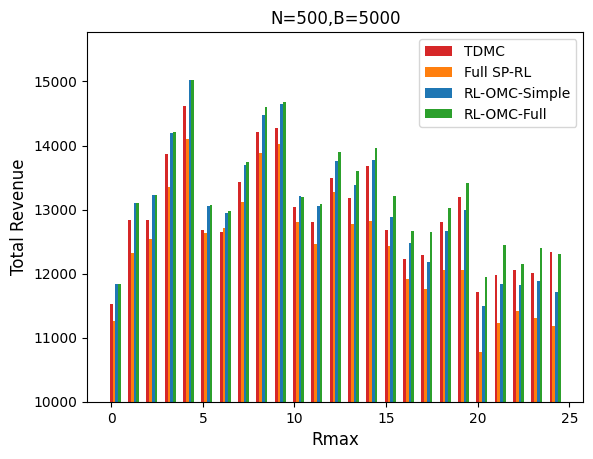

In [88]:
#获得的价值
#['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] 蓝 橙 绿 红
import matplotlib.pyplot as plt
import numpy as np

x=np.array([_ for _ in range(11,61,2)]).astype(np.double)#人数
print(x)
# 定义 y1 和 y2 坐标轴数据
y1 = y41[10::2]#TDMC
y2 = y31[10::2]#Full SP-RL
y3 = y21[10::2]#simple
y4 = y11[10::2]#full

pos1 = np.arange(len(x))
pos2 = [x + 0.15 for x in pos1]
pos3 = [x + 0.3 for x in pos1]
pos4 = [x + 0.45 for x in pos1]
# 绘制柱状图
plt.bar(pos1, y1, width=0.15, label='TDMC',color='#d62728')
plt.bar(pos2, y2, width=0.15, label='Full SP-RL',color='#ff7f0e')
plt.bar(pos3, y3, width=0.15, label='RL-OMC-Simple',color='#1f77b4')
plt.bar(pos4, y4, width=0.15, label='RL-OMC-Full',color='#2ca02c')
# 添加 x 和 y 坐标轴标签
plt.xlabel('Rmax',fontsize=12)
plt.ylabel('Total Revenue',fontsize=12)
# plt.xticks([0,10,20,30,39],[1,2,3,4,5])
# plt.xlim(1,5)
plt.ylim(10000, )
# 添加图例
plt.legend()

# 添加图表标题
plt.title('N=500,B=5000')

# 显示图表
plt.show()


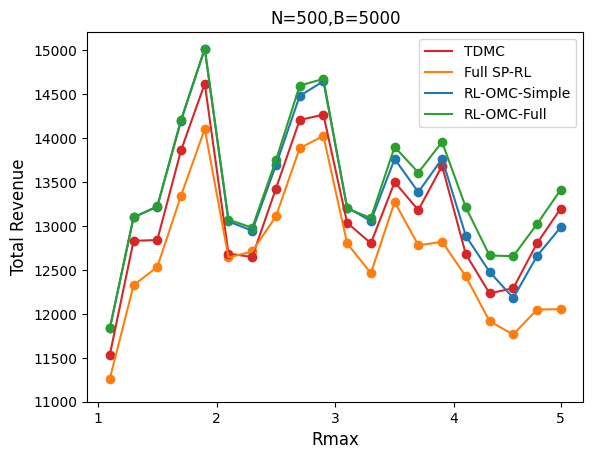

In [13]:
#获得的价值
#['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] 蓝 橙 绿 红
import matplotlib.pyplot as plt
import numpy as np

x=[_ for _ in range(11,51,2)]#人数
# 定义 y1 和 y2 坐标轴数据
y1 = y41[10:-10:2]#TDMC
y2 = y31[10:-10:2]#Full SP-RL
y3 = y21[10:-10:2]#simple
y4 = y11[10:-10:2]#full


# 绘制柱状图
plt.plot(x, y1, label='TDMC',color='#d62728')
plt.plot(x, y2, label='Full SP-RL',color='#ff7f0e')
plt.plot(x, y3, label='RL-OMC-Simple',color='#1f77b4')
plt.plot(x, y4, label='RL-OMC-Full',color='#2ca02c')
markers_x = [_ for _ in range(11,51,2)]
# 添加 x 和 y 坐标轴标签
plt.xlabel('Rmax',fontsize=12)
plt.ylabel('Total Revenue',fontsize=12)
plt.scatter(markers_x, [y3[x.index(marker_x)] for marker_x in markers_x], marker='o')
plt.scatter(markers_x, [y2[x.index(marker_x)] for marker_x in markers_x], marker='o')
plt.scatter(markers_x, [y4[x.index(marker_x)] for marker_x in markers_x], marker='o')
plt.scatter(markers_x, [y1[x.index(marker_x)] for marker_x in markers_x], marker='o')
plt.xticks([10,20,30,40,49],[1,2,3,4,5])
# plt.xlim(1,5)
plt.ylim(11000, )
# 添加图例
plt.legend()

# 添加图表标题
plt.title('N=500,B=5000')
plt.savefig("C:\\Users\\98306\\Desktop\\pdf_figure\\3.1.pdf")
# 显示图表
plt.show()


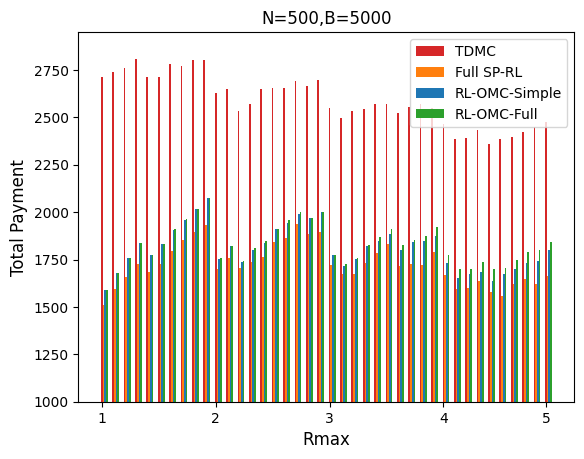

In [75]:
#获得的价值
#['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] 蓝 橙 绿 红
import matplotlib.pyplot as plt
import numpy as np

x=np.array([_ for _ in range(11,51)]).astype(np.double)#人数
y1 = y42[10:-10]#TDMC
y2 = y32[10:-10]#Full SP-RL
y3 = y22[10:-10]#simple
y4 = y12[10:-10]#full
# 绘制柱状图
pos1 = np.arange(len(x))
pos2 = [x + 0.15 for x in pos1]
pos3 = [x + 0.3 for x in pos1]
pos4 = [x + 0.45 for x in pos1]
# 绘制柱状图
plt.bar(pos1, y1, width=0.15, label='TDMC',color='#d62728')
plt.bar(pos2, y2, width=0.15, label='Full SP-RL',color='#ff7f0e')
plt.bar(pos3, y3, width=0.15, label='RL-OMC-Simple',color='#1f77b4')
plt.bar(pos4, y4, width=0.15, label='RL-OMC-Full',color='#2ca02c')
# 添加 x 和 y 坐标轴标签
plt.xlabel('Rmax',fontsize=12)
plt.ylabel('Total Payment',fontsize=12)
plt.xticks([0,10,20,30,39],[1,2,3,4,5])
# plt.xlim(1,5)
plt.ylim(1000, )
# 添加图例
plt.legend()

# 添加图表标题
plt.title('N=500,B=5000')

# 显示图表
plt.show()


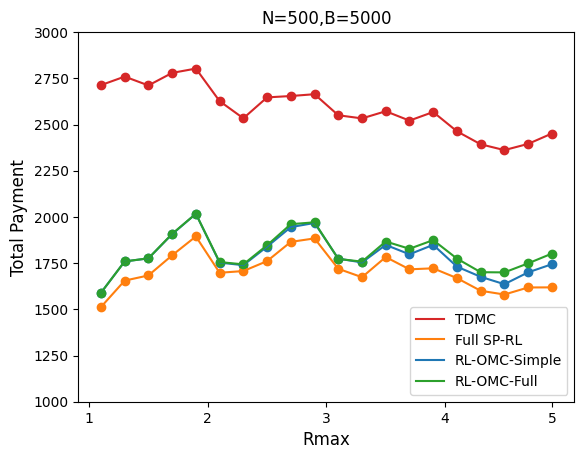

In [14]:
#获得的价值
#['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] 蓝 橙 绿 红
import matplotlib.pyplot as plt
import numpy as np

x=[_ for _ in range(11,51,2)]#人数
# 定义 y1 和 y2 坐标轴数据
y1 = y42[10:-10:2]#TDMC
y2 = y32[10:-10:2]#Full SP-RL
y3 = y22[10:-10:2]#simple
y4 = y12[10:-10:2]#full


# 绘制柱状图
plt.plot(x, y1, label='TDMC',color='#d62728')
plt.plot(x, y2, label='Full SP-RL',color='#ff7f0e')
plt.plot(x, y3, label='RL-OMC-Simple',color='#1f77b4')
plt.plot(x, y4, label='RL-OMC-Full',color='#2ca02c')
markers_x = [_ for _ in range(11,51,2)]
# 添加 x 和 y 坐标轴标签
plt.xlabel('Rmax',fontsize=12)
plt.ylabel('Total Payment',fontsize=12)
plt.scatter(markers_x, [y3[x.index(marker_x)] for marker_x in markers_x], marker='o')
plt.scatter(markers_x, [y2[x.index(marker_x)] for marker_x in markers_x], marker='o')
plt.scatter(markers_x, [y4[x.index(marker_x)] for marker_x in markers_x], marker='o')
plt.scatter(markers_x, [y1[x.index(marker_x)] for marker_x in markers_x], marker='o')
plt.xticks([10,20,30,40,49],[1,2,3,4,5])
# plt.xlim(1,5)
plt.ylim(1000,3000 )
# 添加图例
plt.legend()

# 添加图表标题
plt.title('N=500,B=5000')
plt.savefig("C:\\Users\\98306\\Desktop\\pdf_figure\\3.2.pdf")
# 显示图表
plt.show()


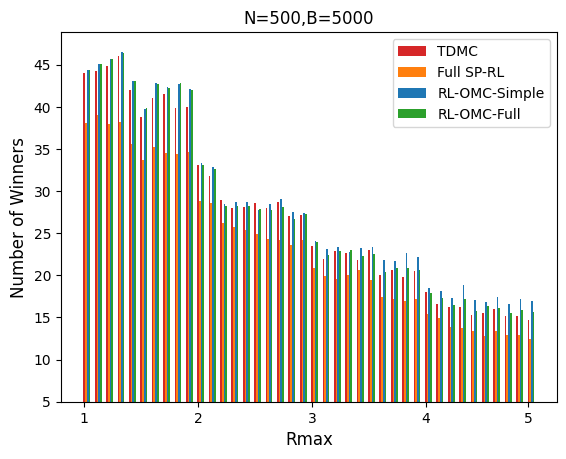

In [143]:
#获得的价值
#['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] 蓝 橙 绿 红
import matplotlib.pyplot as plt
import numpy as np

x=np.array([_ for _ in range(11,51)]).astype(np.double)#人数

# 定义 y1 和 y2 坐标轴数据
y1 = y43[10:-10]#TDMC
y2 = y33[10:-10]#Full SP-RL
y3 = y23[10:-10]#simple
y4 = y13[10:-10]#full

# 绘制柱状图
pos1 = np.arange(len(x))
pos2 = [x + 0.15 for x in pos1]
pos3 = [x + 0.3 for x in pos1]
pos4 = [x + 0.45 for x in pos1]
# 绘制柱状图
plt.bar(pos1, y1, width=0.15, label='TDMC',color='#d62728')
plt.bar(pos2, y2, width=0.15, label='Full SP-RL',color='#ff7f0e')
plt.bar(pos3, y3, width=0.15, label='RL-OMC-Simple',color='#1f77b4')
plt.bar(pos4, y4, width=0.15, label='RL-OMC-Full',color='#2ca02c')
# 添加 x 和 y 坐标轴标签
plt.xlabel('Rmax',fontsize=12)
plt.ylabel('Number of Winners',fontsize=12)
plt.xticks([0,10,20,30,39],[1,2,3,4,5])
# plt.xlim(1,5)
plt.ylim(5, )
# 添加图例
plt.legend()

# 添加图表标题
plt.title('N=500,B=5000')

# 显示图表
plt.show()


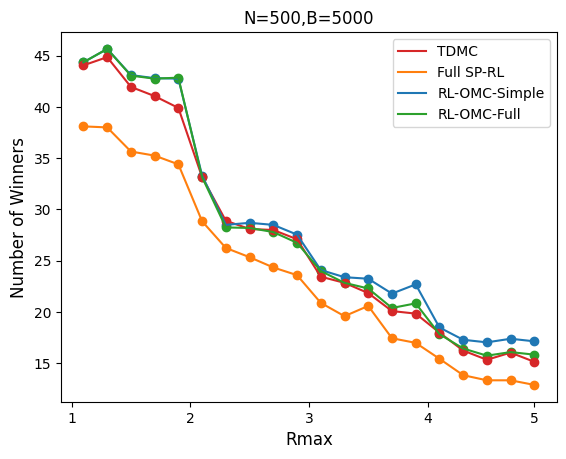

In [15]:
#获得的价值
#['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] 蓝 橙 绿 红
import matplotlib.pyplot as plt
import numpy as np

x=[_ for _ in range(11,51,2)]#人数
# 定义 y1 和 y2 坐标轴数据
y1 = y43[10:-10:2]#TDMC
y2 = y33[10:-10:2]#Full SP-RL
y3 = y23[10:-10:2]#simple
y4 = y13[10:-10:2]#full


# 绘制柱状图
plt.plot(x, y1, label='TDMC',color='#d62728')
plt.plot(x, y2, label='Full SP-RL',color='#ff7f0e')
plt.plot(x, y3, label='RL-OMC-Simple',color='#1f77b4')
plt.plot(x, y4, label='RL-OMC-Full',color='#2ca02c')
markers_x = [_ for _ in range(11,51,2)]
# 添加 x 和 y 坐标轴标签
plt.xlabel('Rmax',fontsize=12)
plt.ylabel('Number of Winners',fontsize=12)
plt.scatter(markers_x, [y3[x.index(marker_x)] for marker_x in markers_x], marker='o')
plt.scatter(markers_x, [y2[x.index(marker_x)] for marker_x in markers_x], marker='o')
plt.scatter(markers_x, [y4[x.index(marker_x)] for marker_x in markers_x], marker='o')
plt.scatter(markers_x, [y1[x.index(marker_x)] for marker_x in markers_x], marker='o')
plt.xticks([10,20,30,40,49],[1,2,3,4,5])
# plt.xlim(1,5)
# plt.ylim(11000, )
# 添加图例
plt.legend()

# 添加图表标题
plt.title('N=500,B=5000')
plt.savefig("C:\\Users\\98306\\Desktop\\pdf_figure\\3.3.pdf")
# 显示图表
plt.show()


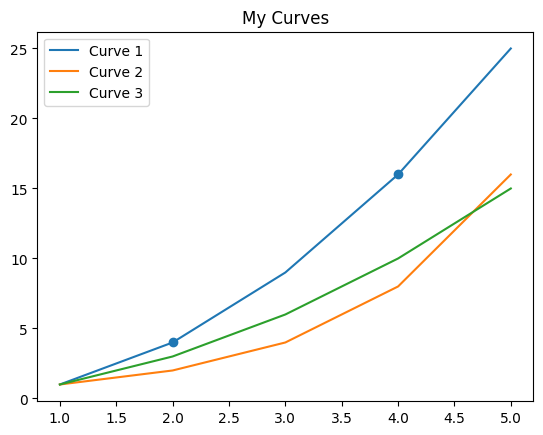

In [118]:
import matplotlib.pyplot as plt

# 输入数据
x = [1, 2, 3, 4, 5]
y1 = [1, 4, 9, 16, 25]
y2 = [1, 2, 4, 8, 16]
y3 = [1, 3, 6, 10, 15]
markers_x = [2, 4]

# 创建一个新的图形并设置标题
plt.figure()
plt.title("My Curves")

# 绘制三条曲线（红色，蓝色，绿色，实线）
plt.plot(x, y1,  label='Curve 1')
plt.plot(x, y2,  label='Curve 2')
plt.plot(x, y3, label='Curve 3')

# 在特定横坐标上添加圆圈标记
plt.scatter(markers_x, [y1[x.index(marker_x)] for marker_x in markers_x], marker='o')

# 添加图例
plt.legend()

# 显示图形
plt.show()
